# Predict molecules given a prompt

In [1]:
%reload_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt
plt.style.use(['science', 'nature'])
from pycm import ConfusionMatrix
import wandb
from sklearn.model_selection import train_test_split
import numpy as np

from gpt3forchem.molecules.data import get_data
from gpt3forchem.molecules.constants import TARGETS, FEATURES, CAT_TARGETS
from gpt3forchem.molecules.create_prompts import create_inverse_prompts
from gpt3forchem.fine_tune import fine_tune
from gpt3forchem.query_model import query_gpt3, extract_prediction

In [2]:
data = get_data()

In [5]:
train_df, test_df = train_test_split(data, train_size=0.6)

In [6]:
train_size = len(train_df)
test_size = len(test_df)
print(f"{len(train_df)} train points and {len(test_df)} test points")


11105 train points and 7404 test points


In [14]:
train_prompts = create_inverse_prompts(train_df)
test_prompts = create_inverse_prompts(test_df)

In [15]:
completion_lengths = []

for i, row in train_prompts.iterrows(): 
    completion_lengths.append(len(row['completion']))

completion_lengths = np.array(completion_lengths)

(array([4146., 4075., 1749.,  584.,  217.,  119.,   81.,   36.,   17.,
          24.]),
 array([  5.,  34.,  63.,  92., 121., 150., 179., 208., 237., 266., 295.]),
 <BarContainer object of 10 artists>)

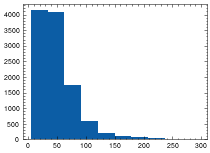

In [16]:
plt.hist(completion_lengths)

In [17]:
len(train_prompts)

11048

In [18]:
len(test_prompts)

7369

### Now, we can fine-tune the model

In [19]:
filename_base = time.strftime("%Y-%m-%d-%H-%M-%S", time.localtime())
train_filename = f"run_files/{filename_base}_train_inverse_prompts_mols_{train_size}.jsonl"
valid_filename = f"run_files/{filename_base}_valid_inverse_prompts_mols_{test_size}.jsonl"
# to save money, just run a small valid frame
valid_small_filename = f"run_files/{filename_base}_validsmall_inverse_prompts_mols_{test_size}.jsonl"
train_prompts.to_json(train_filename, orient="records", lines=True)
test_prompts.to_json(valid_filename, orient="records", lines=True)
test_prompts.sample(100).to_json(valid_small_filename, orient="records", lines=True)

In [20]:
fine_tune(train_filename, valid_small_filename) 

Upload progress: 100%|██████████| 1.70M/1.70M [00:00<00:00, 1.06Git/s]


Uploaded file from run_files/2022-07-18-11-09-42_train_inverse_prompts_mols_11105.jsonl: file-PpUJlB0liTRFnHvLXOBiRPAO


Upload progress: 100%|██████████| 15.9k/15.9k [00:00<00:00, 26.7Mit/s]


Uploaded file from run_files/2022-07-18-11-09-42_validsmall_inverse_prompts_mols_7404.jsonl: file-Tc3kokZZOVvgs6rWflWZ0Hjh
Created fine-tune: ft-l31mvB9YaHUhFYtWtj4Df1Pt
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2022-07-18 11:09:52] Created fine-tune: ft-l31mvB9YaHUhFYtWtj4Df1Pt
[2022-07-18 11:10:00] Fine-tune costs $1.24
[2022-07-18 11:10:01] Fine-tune enqueued. Queue number: 0
[2022-07-18 11:10:02] Fine-tune started
[2022-07-18 11:14:17] Completed epoch 1/4
[2022-07-18 11:18:15] Completed epoch 2/4
[2022-07-18 11:22:13] Completed epoch 3/4

Stream interrupted (client disconnected).
To resume the stream, run:

  openai api fine_tunes.follow -i ft-l31mvB9YaHUhFYtWtj4Df1Pt

Fine-tune ft-l31mvB9YaHUhFYtWtj4Df1Pt has the status "running" and will not be logged
🎉 wandb sync completed successfully
